
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 01  </font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu - 2024</font></center></h3>


================================================================================================================

# Homework instructions

- This homework should be done individually or in group of 2 (max).

- Please provide the names and student IDs of the team-members in the field "Student info" below. If you are not working in a team please insert only your name and student ID.

- Only one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submitting the homework.

- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>27 March 2024 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework.

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle.


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font>Kristjan Lõhmus

<font color='red'>Student ID: </font>B65854



# Dataset details:
**The network data consists of trading countries. There are two files. The first file, *nodes.csv* file has information about the countries where each row consists of node id and the corresponding country name. The second file *edges.csv* contains information about trading countries. Each row represents two countries which trade which each other.**



# Libraries


In [1]:
# Installing additional dependencies
!pip install cairocffi --quiet
!pip install python-igraph --quiet
!pip install networkx --quiet
!pip install matplotlib --quiet
!pip install pandas --quiet

You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Importing libraries
import igraph as ig
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\krist\AppData\Local\Temp\ipykernel_32992\3300784560.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reading the datasets

In [3]:
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

In [4]:
print('Nodes dataset dimension:', nodes.shape, '\nEdges dataset dimension:', edges.shape)

Nodes dataset dimension: (214, 2) 
Edges dataset dimension: (318346, 2)


In [5]:
nodes.head()

id         Name
0   1  Afghanistan
1   2    Australia
2   3      Austria
3   4      Belgium
4   5       Brazil

In [6]:
edges.head()

from  to
0     2   1
1     2   2
2     2   3
3     2   4
4     2   6

# 1. Network creation (1.5 points)

**1.1. Create undirected and unweighted network using nodes and edges datasets (0.25 point)**

<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

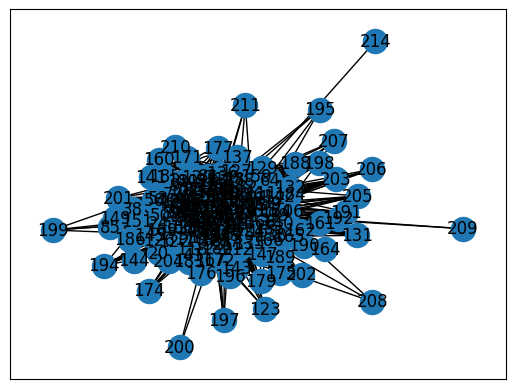

In [7]:
"""
Hint: Use igraph or networkx to create a correct graph type.
"""
G_unweighted_undirected = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=None)
nx.draw_networkx(G_unweighted_undirected)

**1.2. Create undirected and weighted network using nodes and edges datasets (0.25 point)**

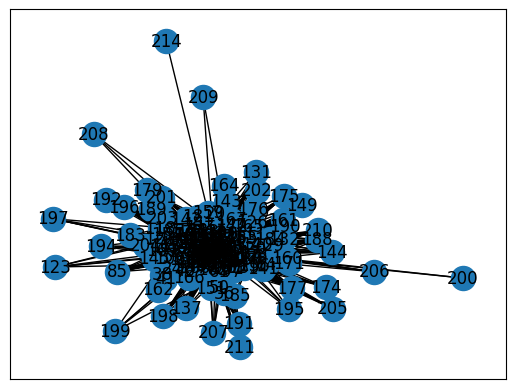

In [8]:
'''
Hint: Create "weight" column in the "edges" dataframe by grouping on "from" and "to" columns.
'''
edges = edges.groupby(['from', 'to']).size().reset_index(name='weight')
G_weighted_undirected = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)
nx.draw_networkx(G_weighted_undirected)

**1.3. Create directed and unweighted network using nodes and edges datasets (0.25 point)**

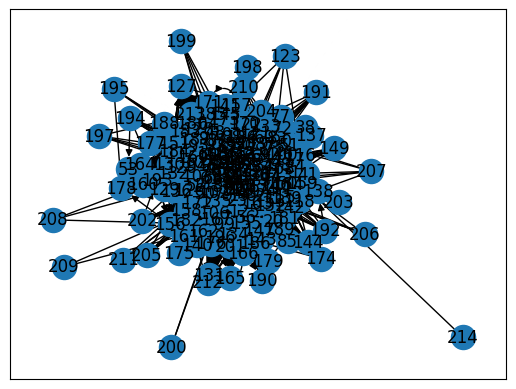

In [9]:
G_unweighted_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=None, create_using=nx.DiGraph())
nx.draw_networkx(G_unweighted_directed)

**1.4. Create directed and weighted network using nodes and edges datasets (0.25 point)**

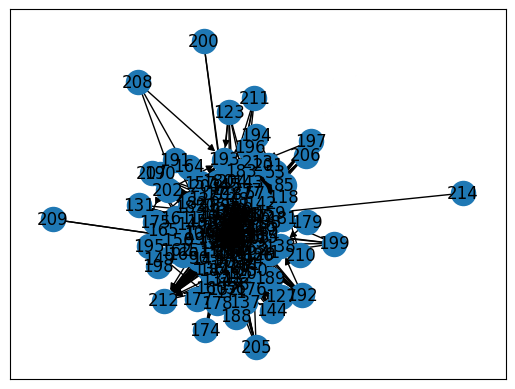

In [10]:
G_weighted_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph())
nx.draw_networkx(G_weighted_directed)

**1.5. Check whether undirected and unweighted network is connected or disconected (0.5 point).**

<font color='red'>How you should answer the following questions. First, in the `#TODO` cell you have to write the code representing your solution. And in the `Your answer` cell write the answer in your own words. It does not have to be a full sentence.</font>

In [11]:
#TODO
nx.algorithms.components.number_connected_components(G_unweighted_undirected)

1

**<font color='red'>Your answer:</font>** The undirected and unweighted network is connected, since it has only one connected component.

# 2. Network properties (3 points)

## 2.1. Edge density (0.5 points).

**2.1.1. Calculate edge density for undirected and unweighted network (0.125 point);**

In [12]:
#TODO
density_undirected_unweighted = nx.classes.function.density(G_unweighted_undirected)
print(density_undirected_unweighted)

0.41424246413057786


**<font color='red'>Your answer:</font>** 0.414

**2.1.2. Calculate edge density for directed and unweighted network (0.125 point)**

In [13]:
density_directed_unweighted = nx.classes.function.density(G_unweighted_directed)
print(density_directed_unweighted)

0.30134702294765475


**<font color='red'>Your answer:</font>** 0.301

**2.1.3 Compare the results you received. Which network has a higher edge density? Why? (0.25 point)**

**<font color='red'>Your answer:</font>** The directed graph can have more edges compared to the undirected graph for the same number of nodes (since edges are bidirectional in undirected graphs). Therefore the edge density is lower in the directed graph.

## 2.2. Clustering coefficient (1 point)

**2.2.1. Calculate average clustering coefficient for undirected and unweighted network (0.125 point);**

In [14]:
#TODO
clustering_undirected_unweighted = nx.average_clustering(G_unweighted_undirected)
print(clustering_undirected_unweighted)

0.8124991062175769


**<font color='red'>Your answer:</font>** 0.812

**2.2.2. Calculate average clustering coefficient for directed and unweighted network (0.125 point);**

In [15]:
#TODO
clustering_directed_unweighted = nx.average_clustering(G_unweighted_directed)
print(clustering_directed_unweighted)

0.7480679346326198


**<font color='red'>Your answer:</font>** 0.748

**2.2.3 Compare the results you received for unweighted networks. Which network has a higher average clustering coefficient? Why? (0.25 point);**

**<font color='red'>Your answer:</font>** Clustering coefficients in directed graphs tend to be lower because the formation of triangles is less likely due to the directed nature of edges (there are more possible triangles). Therefore the clustering coefficient is lower in the directed graph.

**2.2.4. Calculate average clustering coefficient for undirected and weighted network (0.125 point);**

In [16]:
#TODO
clustering_undirected_weighted = nx.average_clustering(G_weighted_undirected)
print(clustering_undirected_weighted)

0.8124991062175769


**<font color='red'>Your answer:</font>** 0.812

**2.2.5. Calculate average clustering coefficient for directed and weighted network (0.125 point);**

In [17]:
#TODO
clustering_directed_weighted = nx.average_clustering(G_weighted_directed)
print(clustering_directed_weighted)

0.7480679346326198


**<font color='red'>Your answer:</font>** 0.748

**2.2.6 Compare the results you received for weighted networks. Which network has a higher average clustering coefficient? Why? (0.25 point);**

**<font color='red'>Your answer:</font>** Same results, leading to the conclusion that weights do not affect the clustering coefficient.

## 2.3. Diameter (0.5 point)

**2.3.1. Calculate diameter for undirected and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [18]:
#TODO
diameter_undirected_unweighted = nx.diameter(G_unweighted_undirected)
print(diameter_undirected_unweighted)

4


**<font color='red'>Your answer:</font>** 4

**2.3.2. Calculate diameter for directed and unweighted network (0.125 point); and interpret the result (0.125 point)**

In [19]:
'''
Hint: This will generate an error. Please find and explain the reason in your own words and suggest a possible solution.
'''
# diameter_directed_unweighted = nx.diameter(G_unweighted_directed)
diameter_directed_unweighted = max([max(j.values()) for (i,j) in nx.shortest_path_length(G_unweighted_directed)])
print(diameter_directed_unweighted)

3


[For further help](https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter)

**<font color='red'>Your answer:</font>**  There are nodes that cannot be reached from other nodes in the graph following the direction of edges. The alternative solution however provides us that the diameter should be 3 (maximum distance found)

## 2.4. Average path length (1 point)

**2.4.1. Calculate average path lenth for undirected and unweighted network (0.125 point);**

In [20]:
avg_path_undirected_unweighted = nx.average_shortest_path_length(G_unweighted_undirected)
print(avg_path_undirected_unweighted)

1.601246105919003


**<font color='red'>Your answer:</font>** 1.6

**2.4.2. Calculate average path lenth for directed and unweighted network (0.125 point);**

In [21]:
from statistics import mean
avg_path_directed_unweighted = mean([max(j.values()) for (i,j) in nx.shortest_path_length(G_unweighted_directed)])
print(avg_path_directed_unweighted)

2.0093457943925235


**<font color='red'>Your answer:</font>** 2

**2.4.3 Compare the results you received for unweighted networks. Which network has a higher average path length? Why? (0.25 point);**

**<font color='red'>Your answer:</font>** 
The average shortest path length typically increases in a directed graph compared to an undirected graph due to the presence of directed edges, which can restrict the traversal between nodes in certain directions. 

**2.4.4. Calculate average path lenth for undirected and weighted network (0.125 point);**

In [22]:
#TODO
avg_path_undirected_weighted = nx.average_shortest_path_length(G_weighted_undirected, weight='weight')
print(avg_path_undirected_weighted)

2.084638673160458


**<font color='red'>Your answer:</font>** 2.084

**2.4.5. Calculate average path lenth for directed and weighted network (0.125 point);**

In [23]:
#TODO
avg_path_directed_weighted = mean([max(j.values()) for (i,j) in nx.shortest_path_length(G_weighted_directed, weight='weight')])
print(avg_path_directed_weighted)

3.2196261682242993


**<font color='red'>Your answer:</font>** 3.219

**2.4.6 Compare the results you received for weighted networks with unweighted networks. Which network type (unweighted vs weighted)  has a higher average path length? Why? (0.25 point);**

**<font color='red'>Your answer:</font>** Weighted graphs tend to have increased average path length, since the "cost" of traversing an edge is increased in some cases due to weights.

# 3. Network centrality measures (2 points)

## 3.1. Degree centrality (0.5 points).

**3.1.1. Find the top 4 countries based on degree centrality for undirected and unweighted network (0.25 point).**

In [24]:
'''
Hint: In case our network is created using edgelist, we need to map it with the actual country name provided in the "nodes" dataframe.
'''
#TODO
node_mapping = dict(zip(nodes.id, nodes.Name))
G_unweighted_undirected = nx.relabel_nodes(G_unweighted_undirected, node_mapping)
sorted(G_unweighted_undirected.degree, key=lambda x: x[1], reverse=True)[:4]

[('China', 189), ('Canada', 187), ('France', 186), ('Netherlands', 186)]

**<font color='red'>Your answer:</font>** China, Canada, France, Netherlands

**3.1.2. Find the top 4 countries based on degree centrality for directed and unweighted network (0.25 point).**

In [25]:
#TODO
G_unweighted_directed = nx.relabel_nodes(G_unweighted_directed, node_mapping)
sorted(G_unweighted_directed.degree, key=lambda x: x[1], reverse=True)[:4]

[('United_States_of_America', 315),
 ('France', 314),
 ('China', 312),
 ('Netherlands', 309)]

**<font color='red'>Your answer:</font>** USA, France, China, Netherlands

## 3.2. Closeness centrality (0.5 points).

**3.2.1. Find the top 4 countries based on closeness centrality for undirected and weighted network (0.25 point)**

In [26]:
'''
Hint: Create 'distance' using 'weight' feature. Refer lab 04 for detail.
'''
G_weighted_undirected = nx.relabel_nodes(G_weighted_undirected, node_mapping)
closeness_centrality = nx.closeness_centrality(G_weighted_undirected, distance='weight')
sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:4]

[('Bahamas', 0.5475578406169666),
 ('Nepal', 0.5378787878787878),
 ('Trinidad_and_Tobago', 0.5365239294710328),
 ('Azerbaijan', 0.5338345864661654)]

**<font color='red'>Your answer:</font>** Bahmas, Nepal, Trinidad and Tobago, Azerbaijan

**3.2.2. Find the top 4 countries based on closeness centrality for directed and weighted network (0.25 point)**

In [27]:
'''
Hint: Create 'distance' using 'weight' feature. Refer lab 04 for detail.
'''
G_weighted_directed = nx.relabel_nodes(G_weighted_directed, node_mapping)
closeness_centrality = nx.closeness_centrality(G_weighted_directed, distance='weight')
sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:4]

[('Indonesia', 0.5023584905660378),
 ('Thailand', 0.4965034965034965),
 ('Republic_of_Korea', 0.4863013698630137),
 ('Tunisia', 0.48409090909090907)]

**<font color='red'>Your answer:</font>** Indonesia, Thailand, Republic of Korea, Tunisia

## 3.3. Betweenness centrality (0.5 points).

**3.3.1. Find the top 4 countries based on Betweenness centrality for undirected and unweighted network (0.25 point)**

In [28]:
#TODO
betweennes_centrality = nx.betweenness_centrality(G_unweighted_undirected)
top_10 = sorted(betweennes_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_10[:4]

[('Canada', 0.028051139946841698),
 ('China', 0.026590249446282587),
 ('Netherlands', 0.02324118105212956),
 ('France', 0.021330692905102557)]

**<font color='red'>Your answer:</font>** Canada, China, Netherlands, France

**3.3.2. Plotted the undirected and unweighted network by highlighting the most important nodes (according to betweenness centrality)
using different size and/or color (0.25 point)**

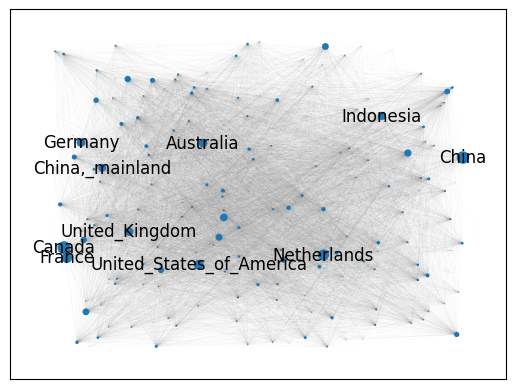

In [29]:
#TODO
size = [(300*val)**2 for val in betweennes_centrality.values()]
labels = [(value, value) for value in dict(top_10).keys()]
nx.draw_networkx(G_unweighted_undirected, node_size=size, pos=nx.random_layout(G_unweighted_undirected), edge_color='grey', labels=dict(labels), width=0.01)

## 3.4. Eigenvector centrality (0.5 points).

**3.4.1. Find the top 4 countries based on Eigenvector centrality for undirected and unweighted network (0.25 point).**

In [30]:
#TODO
eigenvector_centrality = nx.eigenvector_centrality(G_unweighted_undirected)
sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:4]

[('France', 0.10668464631147738),
 ('United_Kingdom', 0.10612872349744887),
 ('China,_mainland', 0.10608959181160256),
 ('Canada', 0.10560489567771723)]

**<font color='red'>Your answer:</font>** France, UK, China mainland, Canada

**3.4.2. Find the top 4 countries based on Eigenvector centrality for directed and weighted network (0.225 point).**

In [31]:
eigenvector_centrality = nx.eigenvector_centrality(G_weighted_undirected)
sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:4]

[('France', 0.10668464631147741),
 ('United_Kingdom', 0.10612872349744888),
 ('China,_mainland', 0.10608959181160259),
 ('Canada', 0.10560489567771726)]

**<font color='red'>Your answer:</font>** France, UK, China mainland, Canada

# 4. Community detection (2 points)

## 4.1. Girvan–Newman (Edge betweenness) (0.5 points)

**4.1.1. Report the optimal number of communities you find using Girvan–Newman algorithm for undirected and unweighted network (0.25 point)**

In [32]:
import itertools
comp = nx.algorithms.community.girvan_newman(G_unweighted_undirected)
# Compute the optimal number of communities
k = 20
modularity = []
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for x in limited:
  modularity.append(nx.algorithms.community.modularity(G_unweighted_undirected, x))

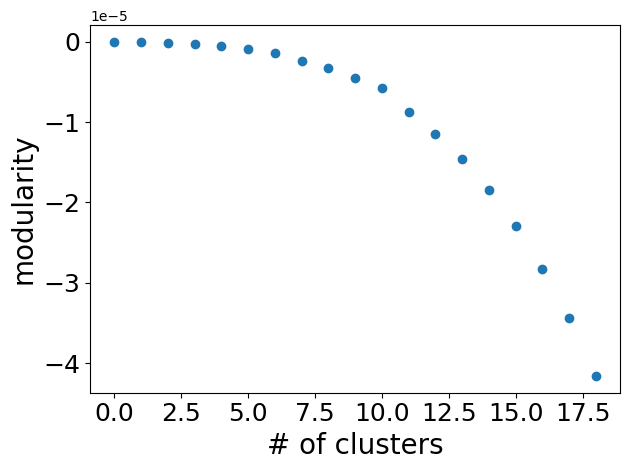

In [33]:
plt.plot(modularity, 'o')
plt.xlabel('# of clusters',fontsize=20)
plt.ylabel('modularity',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

**<font color='red'>Your answer:</font>** 2

**4.1.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to the optimal number of communities based on Girvan–Newman algorithm) using different color (0.25 point).**

In [34]:
optimal_communities = None
for x in nx.algorithms.community.girvan_newman(G_unweighted_undirected):
    if len(x) == 2:
        optimal_communities = x
        break
optimal_num_communities = len(optimal_communities)

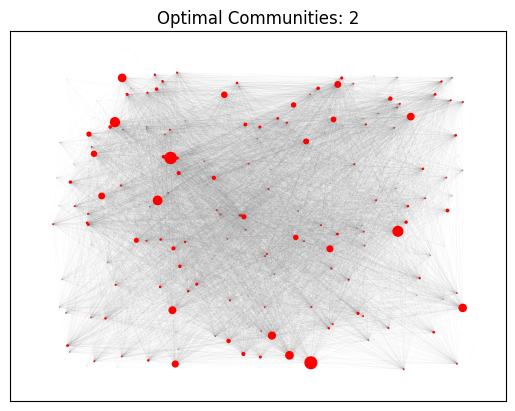

In [35]:
#TODO
# Assign colors to communities
colors = ['r', 'g']
color_map = {}
for i, community in enumerate(optimal_communities):
  for node in community:
    color_map[node] = colors[i]
# Plot the network with nodes colored based on communities
pos = nx.random_layout(G_unweighted_undirected)  # Positions for all nodes
nx.draw_networkx(G_unweighted_undirected, node_size=size, node_color=[color_map[node] for node in G_unweighted_undirected.nodes()], pos=nx.random_layout(G_unweighted_undirected), edge_color='grey', with_labels=False, width=0.01)
plt.title(f"Optimal Communities: {optimal_num_communities}")
plt.show()

## 4.2. Louvian (0.5 points)

**4.2.1. Report the number of communities you find using Louvian algorithm for undirected and unweighted network (0.25 point)**

In [36]:
comp = nx.algorithms.community.louvain_communities(G_unweighted_undirected)
optimal_num_communities = len(comp)
print(optimal_num_communities)

4


**<font color='red'>Your answer:</font>** 5

**4.2.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Louvian algorithm) using different color (0.25 point).**

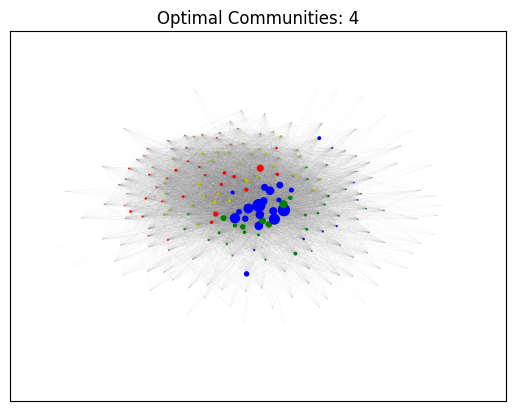

In [37]:
# Assign colors to communities
colors = ['r', 'g', 'b', 'y', 'p']
color_map = {}
for i, community in enumerate(comp):
  for node in community:
    color_map[node] = colors[i]
# Plot the network with nodes colored based on communities
pos = nx.random_layout(G_unweighted_undirected)  # Positions for all nodes
nx.draw_networkx(G_unweighted_undirected, node_size=size, node_color=[color_map[node] for node in G_unweighted_undirected.nodes()],
                 pos=nx.kamada_kawai_layout(G_unweighted_undirected), edge_color='grey', with_labels=False, width=0.01)
plt.title(f"Optimal Communities: {optimal_num_communities}")
plt.show()

## 4.3. Walk Trap (0.5 points)

**4.3.1. Report the number of communities you find using Walk Trap algorithm (with step size = 4) for undirected and unweighted network (0.25 point)**

In [38]:
g = ig.Graph.TupleList(G_unweighted_undirected.edges(), directed=False)
wtrap = g.community_walktrap(steps = 4)
comp = wtrap.as_clustering()
# Report the number of communities found

optimal_num_communities = len(comp)
print("Number of communities found using Walk Trap algorithm:", optimal_num_communities)

Number of communities found using Walk Trap algorithm: 6


**<font color='red'>Your answer:</font>** 6

**4.3.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Walk Trap algorithm with step size = 4) using different color (0.25 point).**

In [39]:
# Assign colors to communities
ig.plot(comp, mark_groups = True, bbox=(300,300))

## 4.4. Label propagation (0.5 points)

**4.4.1. Report the number of communities you find using Label propagation algorithm for undirected and unweighted network (0.25 point)**

In [40]:
comp = nx.algorithms.community.label_propagation.label_propagation_communities(G_unweighted_undirected)
optimal_num_communities = len(comp)
print(optimal_num_communities)

1


**<font color='red'>Your answer:</font>** 1

**4.4.2. Plotted the undirected and unweighted network by highlighting the nodes in various communities (according to Label propagation algorithm) using different color (0.25 point).**

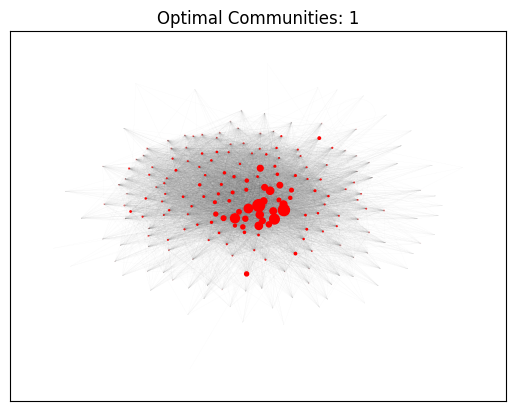

In [41]:
# Assign colors to communities
colors = ['r', 'g', 'b', 'y']
color_map = {}
for i, community in enumerate(comp):
  for node in community:
    color_map[node] = colors[i]
# Plot the network with nodes colored based on communities
pos = nx.random_layout(G_unweighted_undirected)  # Positions for all nodes
nx.draw_networkx(G_unweighted_undirected, node_size=size, node_color=[color_map[node] for node in G_unweighted_undirected.nodes()],
                 pos=nx.kamada_kawai_layout(G_unweighted_undirected), edge_color='grey', with_labels=False, width=0.01)
plt.title(f"Optimal Communities: {optimal_num_communities}")
plt.show()

# 5. Network Visualization Using Gephi (1.5 points)

**5.1. Create graph using gephi. Adjust the node size based on degree centrality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

<font color='red'>Please note that you don't need to upload the png file. You can insert it and save the notebook and it will be available to us.</font>

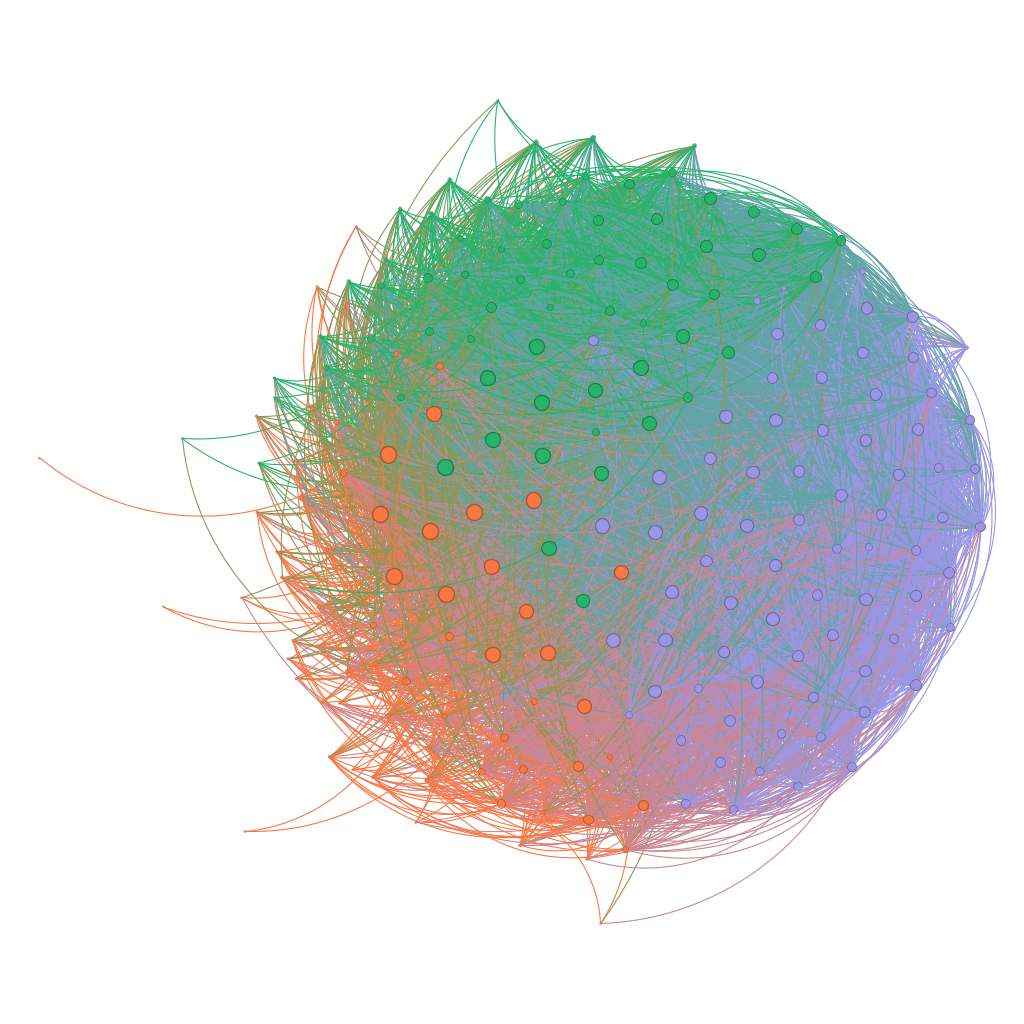

In [42]:
from IPython.display import Image
#nx.write_graphml(G_unweighted_undirected, 'unweighted_undirected.graphml')
Image("5_1.png")

**5.2. Create graph using gephi. Adjust the node size based on PageRank centrality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

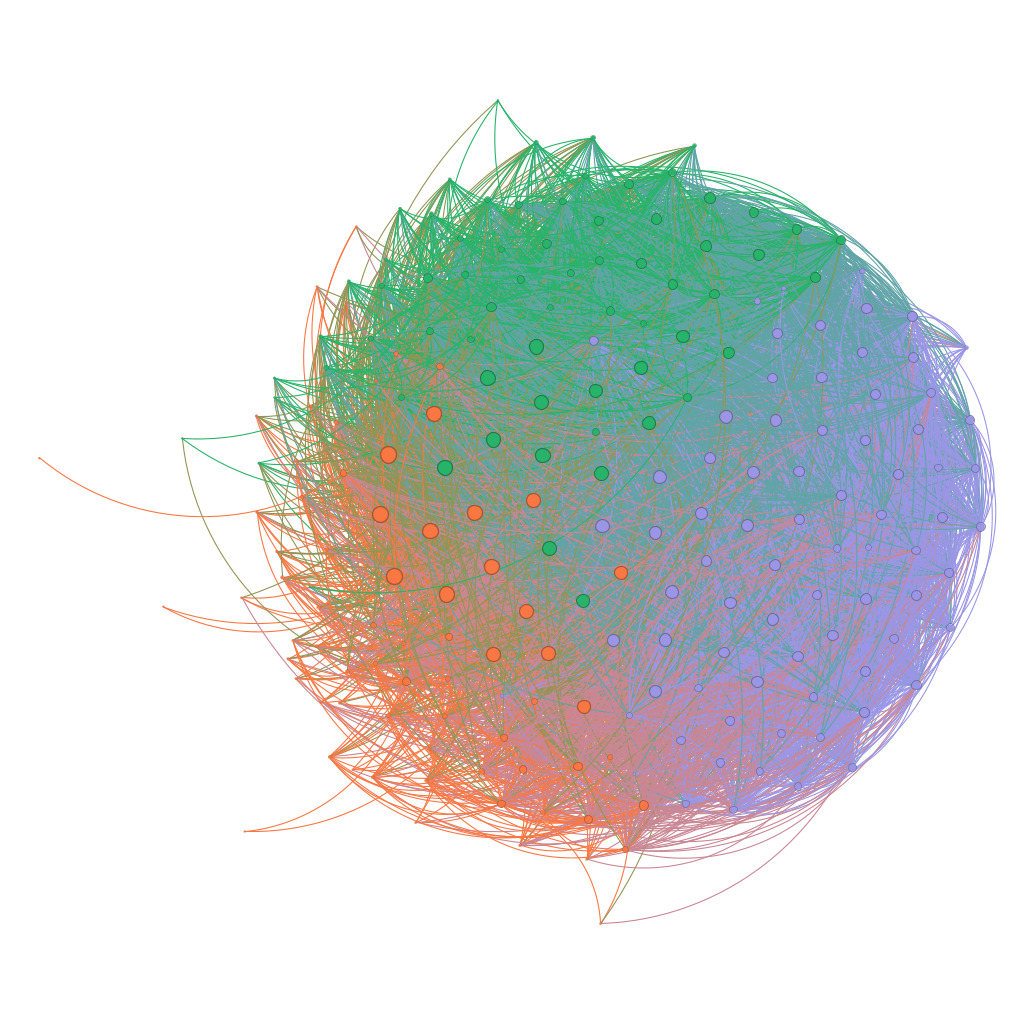

In [43]:
#Image("ImageName.png")
Image("5_2.png")

**5.3. Create graph using gephi. Adjust the node size based on eigenvector centality (for undirected network) and color them based on modularity value. Please import your network as png and attach to the notebook (0.5 point)**

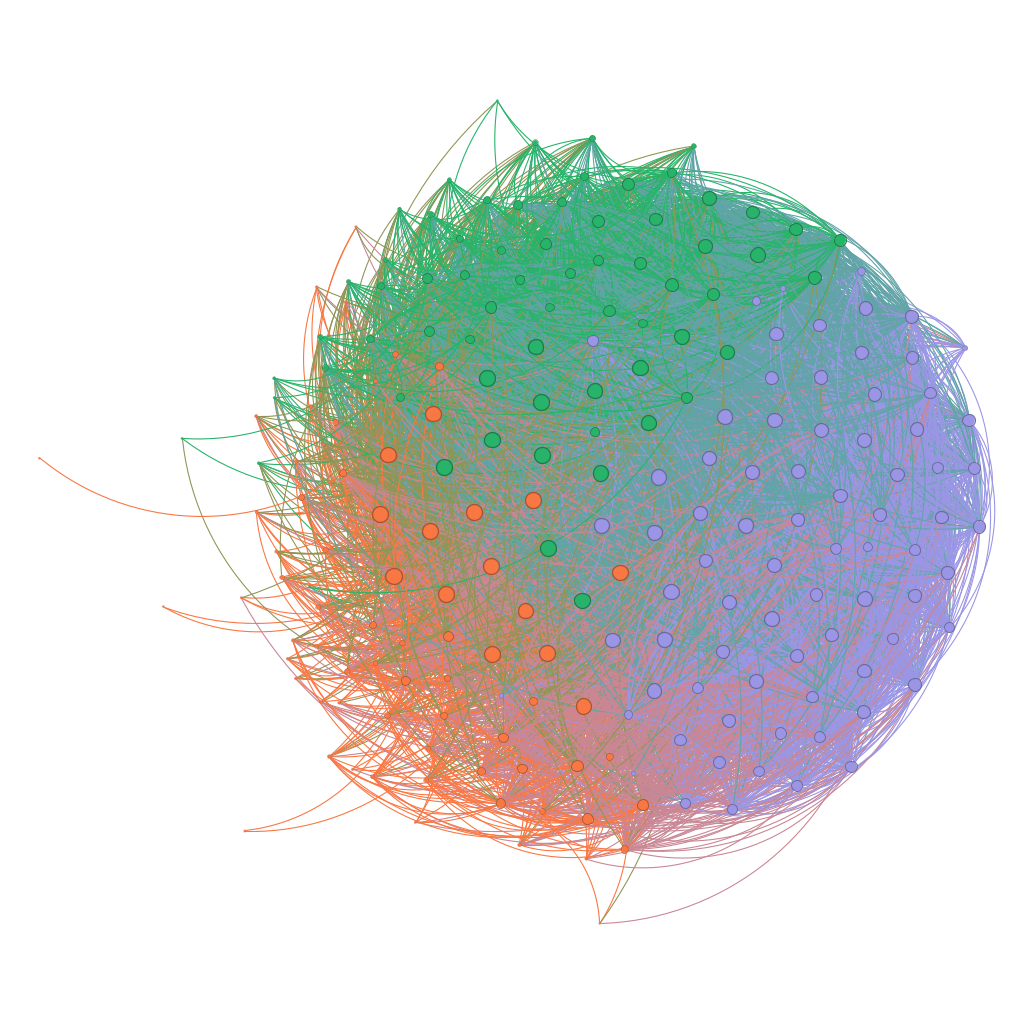

In [44]:
#Image("ImageName.png")
Image("5_3.png")

# 6. Link prediction using varoius scoring method (5 points)

<font color='red'>At the start, we have provided the necessary codes. Please run all of these cells before starting tasks 6.1 through 6.3.</font>

In [45]:
!pip install networkx==2.8 --quiet
!pip install scipy==1.8.0 --quiet
!pip install tqdm --quiet

You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\krist\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import networkx as nx

In [47]:
# load nodes details
with open("fb-pages-food.nodes", encoding='utf-8') as f:
    fb_nodes = f.read().splitlines()

# load edges (or links)
with open("fb-pages-food.edges", encoding='utf-8') as f:
    fb_links = f.read().splitlines()

len(fb_nodes), len(fb_links)

(621, 2102)

In [48]:
# capture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})
fb_df = fb_df[fb_df.node_1 != fb_df.node_2]
fb_df.head()

100%|██████████| 2102/2102 [00:00<00:00, 2042731.00it/s]


node_1 node_2
0      0    276
1      0     58
2      0    132
3      0    603
4      0    398

In [49]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.convert_matrix.to_numpy_array(G, nodelist = node_list)

# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, str(i), str(j)) <= 2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_list[i],node_list[j]])

  offset = offset + 1


node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked,
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):

  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())

  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    fb_df_temp = fb_df_temp.drop(index = i)


# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

data = pd.concat([data, fb_df_ghost[['node_1', 'node_2', 'link']]], ignore_index=True)

# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

100%|██████████| 2091/2091 [00:05<00:00, 359.71it/s]


## **6.1. Calculate all the scores for every pair in "data" using graph "G_data". (3.5 points)**

<font color='red'>You can add extra cells if required.</font>

In [50]:
# 1. Number of common neighbors
data['common_neighbor'] = data.apply(lambda row: len(list(nx.common_neighbors(G_data, row['node_1'], row['node_2']))), axis=1)

In [51]:
# 2. Jaccard coefficient
node_pairs = data[['node_1', 'node_2']].values.tolist()
preds = nx.jaccard_coefficient(G_data, node_pairs)
jac_sim = []
for u, v, p in preds:
  jac_sim.append(p)
data['jaccard_similarity'] = jac_sim
data

node_1 node_2  link  common_neighbor  jaccard_similarity
0          0     22     0                0            0.000000
1          0    526     0                0            0.000000
2          0     36     0                0            0.000000
3          0     54     0                0            0.000000
4          0     56     0                0            0.000000
...      ...    ...   ...              ...                 ...
20485    576    584     1                0            0.000000
20486    576    601     1                0            0.000000
20487    584    603     1                0            0.000000
20488    597    601     1                0            0.000000
20489    601    603     1                1            0.111111

[20490 rows x 5 columns]

In [52]:
# 3. Adamic/Adar
preds = nx.adamic_adar_index(G_data, node_pairs)
adamic_sim = []
for u, v, p in preds:
  adamic_sim.append(p)

data['adamic_adar_index'] = adamic_sim
data

node_1 node_2  link  common_neighbor  jaccard_similarity  \
0          0     22     0                0            0.000000   
1          0    526     0                0            0.000000   
2          0     36     0                0            0.000000   
3          0     54     0                0            0.000000   
4          0     56     0                0            0.000000   
...      ...    ...   ...              ...                 ...   
20485    576    584     1                0            0.000000   
20486    576    601     1                0            0.000000   
20487    584    603     1                0            0.000000   
20488    597    601     1                0            0.000000   
20489    601    603     1                1            0.111111   

       adamic_adar_index  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
...                  ...  
20485           0.000000  
20486           0.000000  
20487           0.000000  
20488           0.000000  
20489           0.434294  

[20490 rows x 6 columns]

In [53]:
# 4. Shortest path
data['shortest_path'] =  data.apply(lambda row: len(nx.shortest_path(G_data, source=row['node_1'], target=row['node_2'])), axis=1)
data

node_1 node_2  link  common_neighbor  jaccard_similarity  \
0          0     22     0                0            0.000000   
1          0    526     0                0            0.000000   
2          0     36     0                0            0.000000   
3          0     54     0                0            0.000000   
4          0     56     0                0            0.000000   
...      ...    ...   ...              ...                 ...   
20485    576    584     1                0            0.000000   
20486    576    601     1                0            0.000000   
20487    584    603     1                0            0.000000   
20488    597    601     1                0            0.000000   
20489    601    603     1                1            0.111111   

       adamic_adar_index  shortest_path  
0               0.000000             14  
1               0.000000             12  
2               0.000000             23  
3               0.000000             11  
4               0.000000             11  
...                  ...            ...  
20485           0.000000              5  
20486           0.000000              4  
20487           0.000000              4  
20488           0.000000              4  
20489           0.434294              3  

[20490 rows x 7 columns]

In [54]:
# 5. Preferrential attachment
preds = nx.preferential_attachment(G_data, node_pairs)
preferrential_sim = []
for u, v, p in preds:
  preferrential_sim.append(p)

data['preferrential_attachment'] = preferrential_sim
data

node_1 node_2  link  common_neighbor  jaccard_similarity  \
0          0     22     0                0            0.000000   
1          0    526     0                0            0.000000   
2          0     36     0                0            0.000000   
3          0     54     0                0            0.000000   
4          0     56     0                0            0.000000   
...      ...    ...   ...              ...                 ...   
20485    576    584     1                0            0.000000   
20486    576    601     1                0            0.000000   
20487    584    603     1                0            0.000000   
20488    597    601     1                0            0.000000   
20489    601    603     1                1            0.111111   

       adamic_adar_index  shortest_path  preferrential_attachment  
0               0.000000             14                         1  
1               0.000000             12                         2  
2               0.000000             23                         1  
3               0.000000             11                         1  
4               0.000000             11                         2  
...                  ...            ...                       ...  
20485           0.000000              5                         8  
20486           0.000000              4                        10  
20487           0.000000              4                        20  
20488           0.000000              4                        25  
20489           0.434294              3                        25  

[20490 rows x 8 columns]

In [55]:
# 6. Hitting times
from statistics import mode 
distances = []
for pair in node_pairs:
    dist = []
    all_simple_paths = nx.all_simple_paths(G_data, pair[0], pair[1])
    for path in all_simple_paths:
      dist.append(len(path))
    distances.append(mode(dist))
data['hitting_time'] = distances
data

node_1 node_2  link  common_neighbor  jaccard_similarity  \
0          0     22     0                0            0.000000   
1          0    526     0                0            0.000000   
2          0     36     0                0            0.000000   
3          0     54     0                0            0.000000   
4          0     56     0                0            0.000000   
...      ...    ...   ...              ...                 ...   
20485    576    584     1                0            0.000000   
20486    576    601     1                0            0.000000   
20487    584    603     1                0            0.000000   
20488    597    601     1                0            0.000000   
20489    601    603     1                1            0.111111   

       adamic_adar_index  shortest_path  preferrential_attachment  \
0               0.000000             14                         1   
1               0.000000             12                         2   
2               0.000000             23                         1   
3               0.000000             11                         1   
4               0.000000             11                         2   
...                  ...            ...                       ...   
20485           0.000000              5                         8   
20486           0.000000              4                        10   
20487           0.000000              4                        20   
20488           0.000000              4                        25   
20489           0.434294              3                        25   

       hitting_time  
0                14  
1                12  
2                23  
3                11  
4                11  
...             ...  
20485             5  
20486             4  
20487             4  
20488             4  
20489             3  

[20490 rows x 9 columns]

In [56]:
# 7. SimRank
simranks = []
simrank = nx.simrank_similarity(G_data)
i = 0
for pair in node_pairs:
    simranks.append(simrank[pair[0]][pair[1]])
data['simrank'] = simranks
data

node_1 node_2  link  common_neighbor  jaccard_similarity  \
0          0     22     0                0            0.000000   
1          0    526     0                0            0.000000   
2          0     36     0                0            0.000000   
3          0     54     0                0            0.000000   
4          0     56     0                0            0.000000   
...      ...    ...   ...              ...                 ...   
20485    576    584     1                0            0.000000   
20486    576    601     1                0            0.000000   
20487    584    603     1                0            0.000000   
20488    597    601     1                0            0.000000   
20489    601    603     1                1            0.111111   

       adamic_adar_index  shortest_path  preferrential_attachment  \
0               0.000000             14                         1   
1               0.000000             12                         2   
2               0.000000             23                         1   
3               0.000000             11                         1   
4               0.000000             11                         2   
...                  ...            ...                       ...   
20485           0.000000              5                         8   
20486           0.000000              4                        10   
20487           0.000000              4                        20   
20488           0.000000              4                        25   
20489           0.434294              3                        25   

       hitting_time       simrank  
0                14  0.000000e+00  
1                12  0.000000e+00  
2                23  4.964747e-07  
3                11  8.971994e-04  
4                11  1.944680e-04  
...             ...           ...  
20485             5  3.711929e-02  
20486             4  0.000000e+00  
20487             4  0.000000e+00  
20488             4  0.000000e+00  
20489             3  1.492403e-01  

[20490 rows x 10 columns]

## **6.2. Create features and target value for the model. Split dataset into training and testing. (0.5 point)**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [58]:
'''
Hint: Remove columns node_1, node_2 and link while creating "x" from data.
'''
x = data.drop(columns=['node_1', 'node_2', 'link'])
y = data['link']

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 35)

## **6.3. Apply logistic regression model and report auc roc score. (1 point)**

In [60]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

In [61]:
predictions = lr.predict_proba(xtest)
roc_auc_score(y_true=ytest, y_score=predictions[:,1])

0.8460984291893459

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X into your estimate.

<font color='red'> **Answer:**</font> 8 hours

## What is the level of difficulty for this homework?
Please put a number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font> 7